In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ice-cream-sales-dataset/Ice Cream.csv


In [3]:
#read
data= pd.read_csv('/kaggle/input/ice-cream-sales-dataset/Ice Cream.csv')
data.head()
data.shape
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


Text(0.5, 1.0, 'Linear Relation between Temperature & Revenue ')

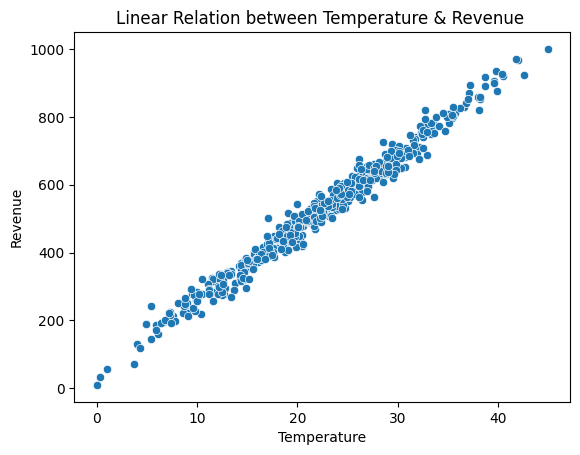

In [4]:
#graph
import seaborn as sns
sns.scatterplot(data,x='Temperature',y='Revenue')
plt.title("Linear Relation between Temperature & Revenue ")


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Revenue Distribution')

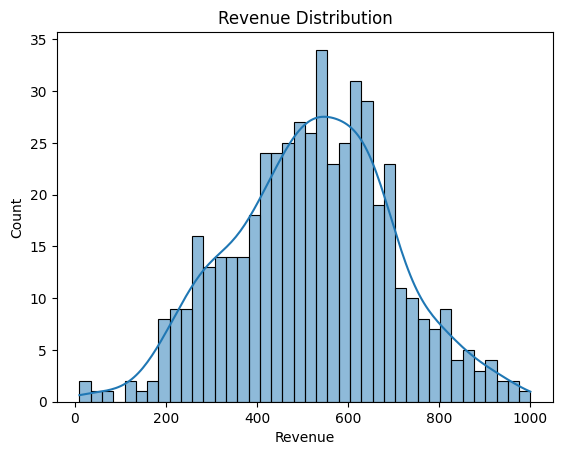

In [5]:
sns.histplot(data['Revenue'],bins=40,kde=True)
plt.title("Revenue Distribution")

In [14]:
x=data[['Temperature']]
y=data[['Revenue']]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state = 500)
print("The shape of the X_train: ",xtrain.shape)
print("The shape of the X_test: ",xtest.shape)
print("The shape of the y_train: ",ytrain.shape)
print("The shape of the y_test: ",ytest.shape)

The shape of the X_train:  (375, 1)
The shape of the X_test:  (125, 1)
The shape of the y_train:  (375, 1)
The shape of the y_test:  (125, 1)


In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


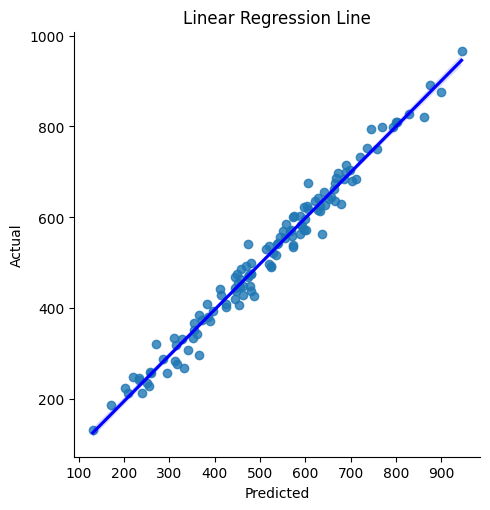

In [24]:

# Make predictions
Y_pred = lr.predict(xtest)

# Flatten both arrays to 1D
Y_pred = Y_pred.flatten()
ytest_flat = ytest.values.flatten()   # make sure both are 1D

# Create DataFrame with equal-length, flat arrays
d = pd.DataFrame({
    'Predicted': Y_pred,
    'Actual': ytest_flat
})

# Plot regression line
sns.lmplot(x='Predicted', y='Actual', data=d, line_kws={'color': 'blue'})
plt.title("Linear Regression Line")
plt.show()

In [29]:
#Accuracy 
from sklearn.metrics import mean_absolute_percentage_error
error = mean_absolute_percentage_error(Y_pred,ytest)
print("Accuracy of the Linear Regression is %.2f"%((1-error)*100),'%')
from sklearn.metrics import r2_score

# Model R² score directly
print("Model R² Score (using lr.score):", lr.score(xtest, ytest))

# R² score manually
Y_pred = lr.predict(xtest)
print("R² Score (using r2_score):", r2_score(ytest, Y_pred))

Accuracy of the Linear Regression is 95.64 %
Model R² Score (using lr.score): 0.9782777598086646
R² Score (using r2_score): 0.9782777598086646
